<a href="https://colab.research.google.com/github/Marcotmr/Google-Stock-Price-Forecasting-with-Prophet/blob/main/Google_Stock_Close_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prophet

In [2]:
pip install pystan cython

In [3]:
%matplotlib inline
from prophet import Prophet
import numpy as np
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
google_stock = pd.read_csv('/content/GOOGL.csv')

In [5]:
#delete unecessary columns
google_stock = google_stock.drop(google_stock.columns[[1,2,3,5,6]], axis=1)

In [6]:
#Transforming to stationary data
google_stock['y'] = (google_stock['Close'])
google_stock['ds'] = google_stock['Date']
google_stock = google_stock.drop(google_stock.columns[[0,1]], axis=1)

In [7]:
google_stock.iloc[:,[1,0]]

,ds,y
0,2004-08-19,50.220219
1,2004-08-20,54.209209
2,2004-08-23,54.754753
3,2004-08-24,52.487488
4,2004-08-25,53.053055
...,...,...
4426,2022-03-18,2722.510010
4427,2022-03-21,2722.030029
4428,2022-03-22,2797.360107
4429,2022-03-23,2765.510010


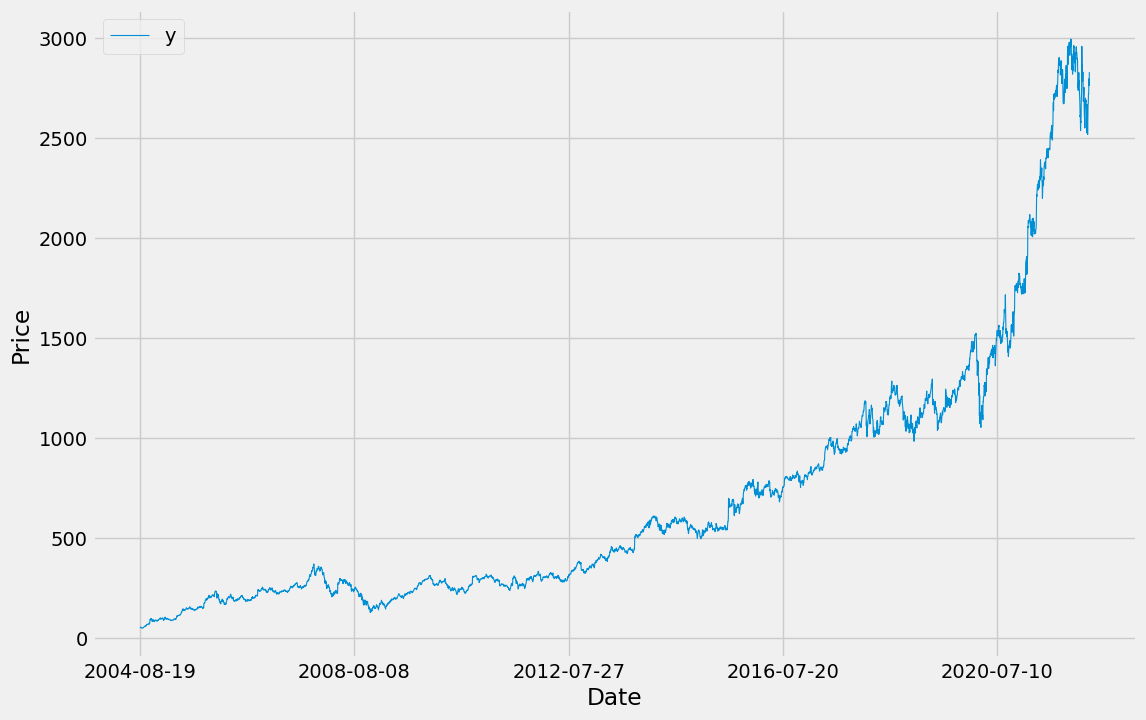

In [15]:
ax = google_stock.set_index('ds').plot(figsize=(12, 8), linewidth =0.8)
ax.set_ylabel('Price')
ax.set_xlabel('Date')
plt.show()

In [43]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, daily_seasonality=True)

In [44]:
my_model.fit(google_stock)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpbhxo9jb5/499udg6n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbhxo9jb5/vi25j42f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96157', 'data', 'file=/tmp/tmpbhxo9jb5/499udg6n.json', 'init=/tmp/tmpbhxo9jb5/vi25j42f.json', 'output', 'file=/tmp/tmpbhxo9jb5/prophet_modelu5pp3w9b/prophet_model-20230925230356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:03:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:04:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [45]:
future_dates = my_model.make_future_dataframe(periods=1500, freq='d')
future_dates.tail()

,ds
5926,2026-04-28
5927,2026-04-29
5928,2026-04-30
5929,2026-05-01
5930,2026-05-02


In [46]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5926,2026-04-28,4824.955116,3417.962911,6175.154818
5927,2026-04-29,4827.834530,3391.779373,6131.166465
5928,2026-04-30,4829.531080,3394.308310,6135.791845
5929,2026-05-01,4830.433277,3369.727467,6183.688949
5930,2026-05-02,4828.363711,3429.677727,6202.231159


<Figure size 3000x1800 with 0 Axes>

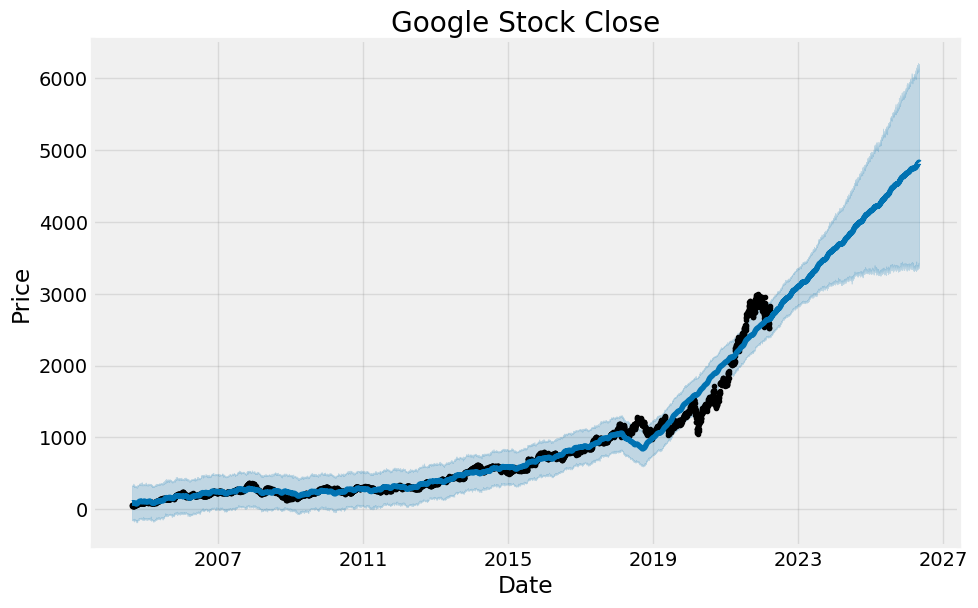

In [59]:
#Plot forecast
plt.figure(figsize=(10, 6), dpi=300)

my_model.plot(forecast, uncertainty=True)

plt.title('Google Stock Close')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

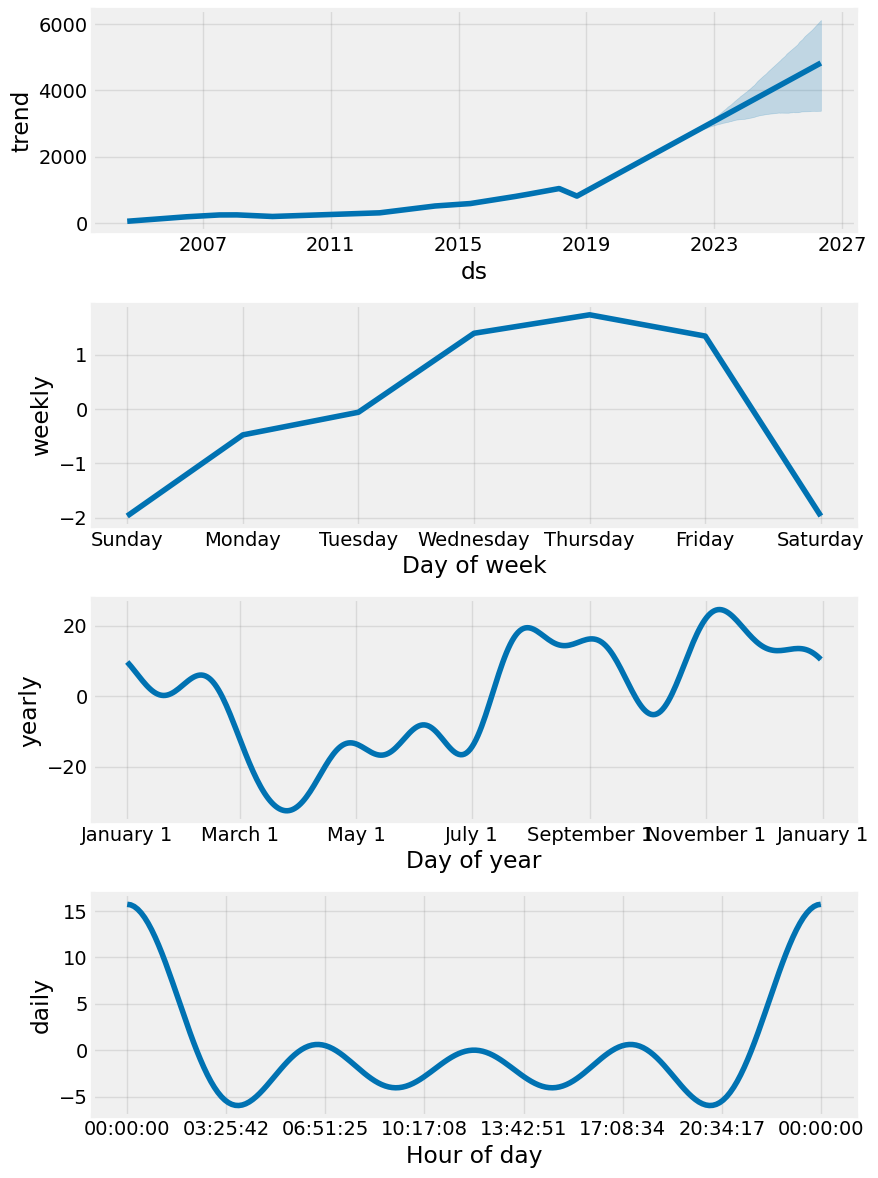

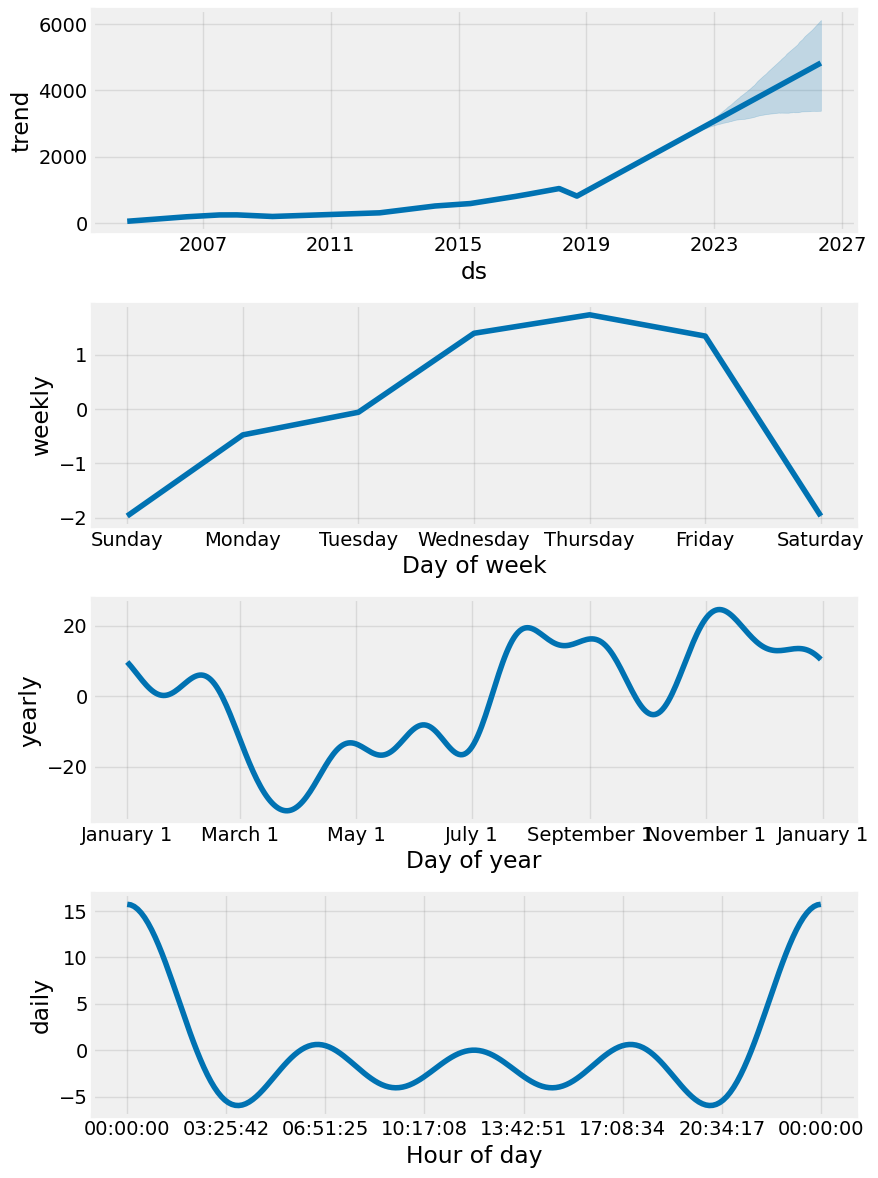

In [48]:
my_model.plot_components(forecast)

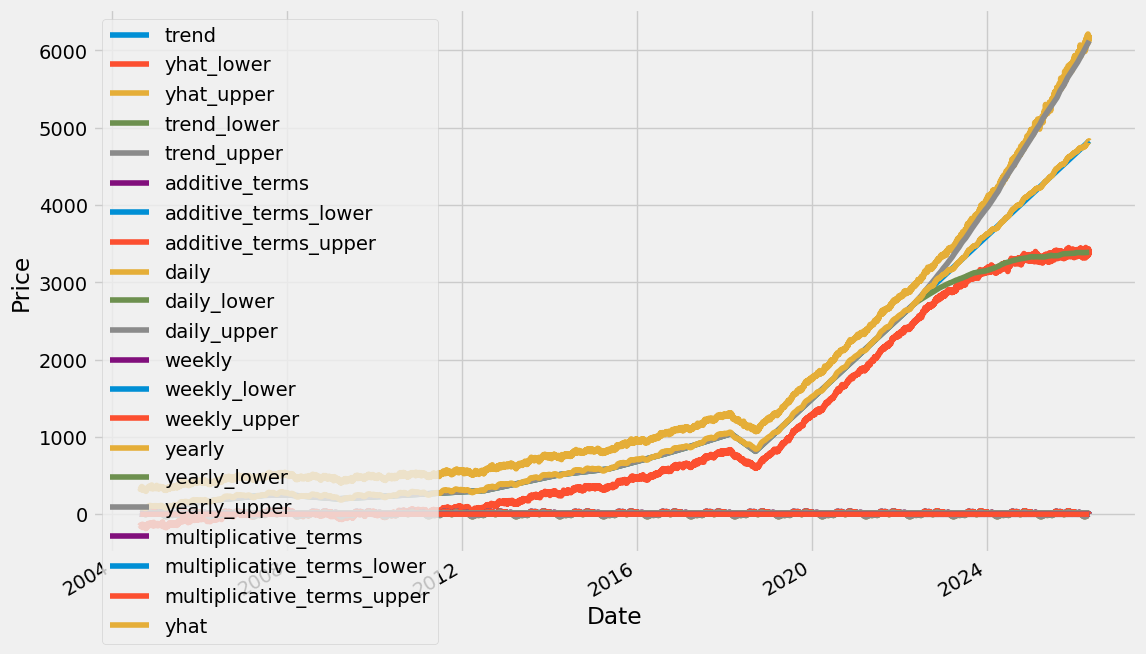

In [49]:
ax = forecast.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')
plt.show()

Text(0.5, 1.0, 'Google Stock Closing Price Prediction')

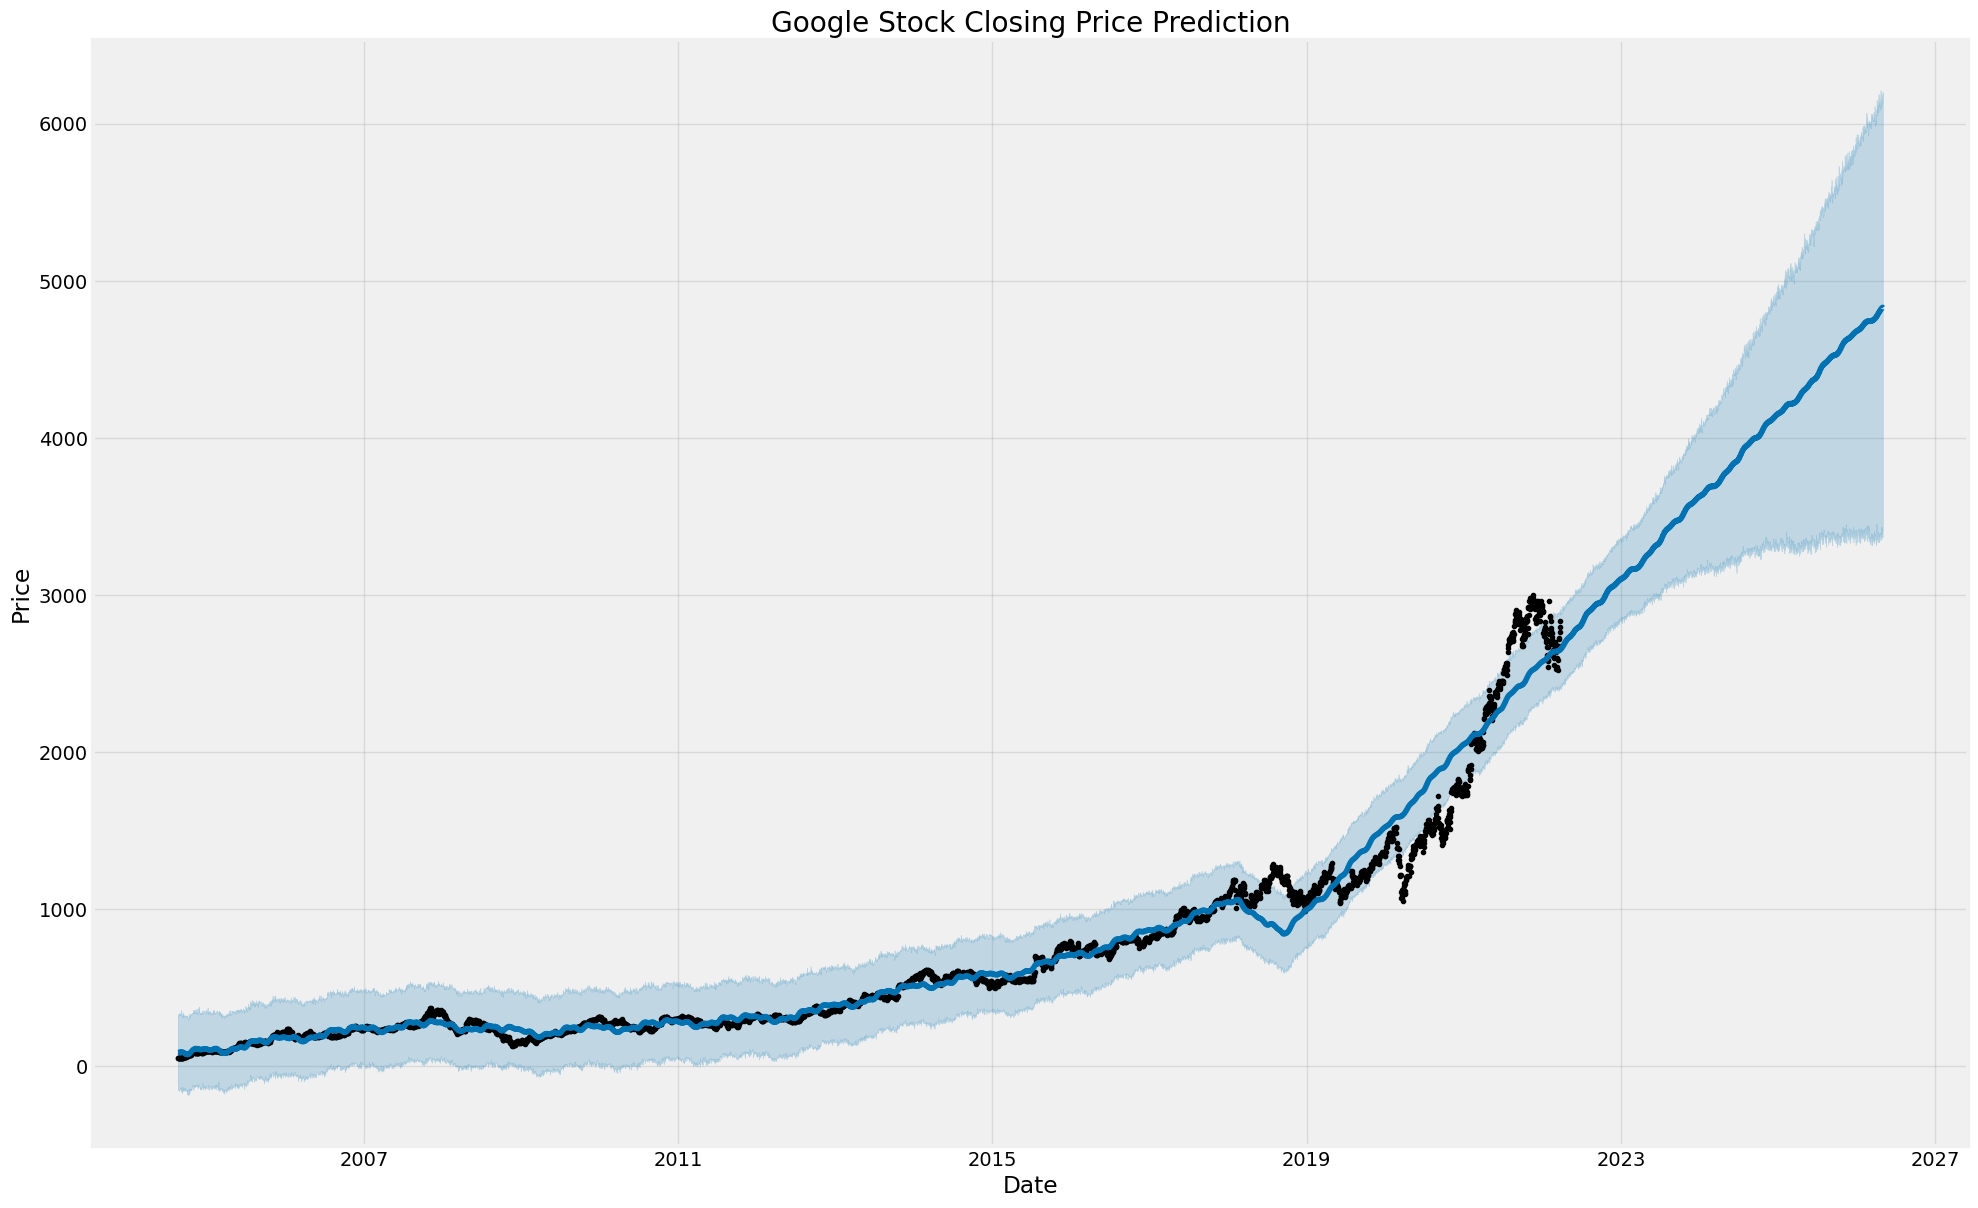

In [73]:
from prophet.plot import plot

plot(my_model, forecast, figsize=(20, 12), uncertainty=True, xlabel = "Date", ylabel="Price")
plt.title('Google Stock Closing Price Prediction')